# TidyTuesday - Week 23 - Survivor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from janitor import clean_names
%matplotlib inline

In [2]:
castaways = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-01/castaways.csv')
challenges = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-01/challenges.csv')
jury_votes = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-01/jury_votes.csv')
summary = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-01/summary.csv')
viewers = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-06-01/viewers.csv')
castaways.shape, challenges.shape, jury_votes.shape, summary.shape, viewers.shape

((744, 18), (5023, 8), (909, 5), (40, 19), (596, 9))

In [73]:
castaways.head()
#challenges.head()
#jury_votes.head()
#summary.head()
#viewers.head()

,season_name,season,full_name,castaway,age,city,state,personality_type,day,order,result,jury_status,original_tribe,swapped_tribe,swapped_tribe2,merged_tribe,total_votes_received,immunity_idols_won
0,Survivor: Winners at War,40,Natalie Anderson,Natalie,33,Edgewater,New Jersey,ESTP,2,1,1st voted out,NaN,Sele,NaN,NaN,NaN,11,1
1,Survivor: Winners at War,40,Amber Mariano,Amber,40,Pensacola,Florida,ISFP,3,2,2nd voted out,1st jury member,Dakal,NaN,NaN,NaN,6,0
2,Survivor: Winners at War,40,Danni Boatwright,Danni,43,Shawnee,Kansas,ENFJ,6,3,3rd voted out,2nd jury member,Sele,NaN,NaN,NaN,8,0
3,Survivor: Winners at War,40,Ethan Zohn,Ethan,45,Hillsborough,New Hampshire,ISFP,9,4,4th voted out,3rd jury member,Sele,NaN,NaN,NaN,4,0
4,Survivor: Winners at War,40,Tyson Apostol,Tyson,39,Mesa,Arizona,ESTP,11,5,5th voted out,NaN,Dakal,NaN,NaN,NaN,12,0


In [4]:
castaways[castaways.personality_type.notnull()].personality_type.value_counts()

ENFP    74
ESFP    67
ISFP    65
ESTP    63
ESTJ    53
ISTJ    52
INFP    52
ENTP    47
INTP    41
ENFJ    38
ESFJ    38
ISFJ    35
ISTP    34
ENTJ    30
INFJ    26
INTJ    26
Name: personality_type, dtype: int64

In [5]:
# https://stackoverflow.com/questions/19384532/get-statistics-for-each-group-such-as-count-mean-etc-using-pandas-groupby
gb = castaways[castaways.personality_type.notnull()].groupby('personality_type')
types = gb.size().to_frame(name='count')
types.head()

,count
personality_type,
ENFJ,38
ENFP,74
ENTJ,30
ENTP,47
ESFJ,38


In [6]:
types = (types.join(gb.agg({'total_votes_received': 'sum'}).rename(columns={'total_votes_received': 'total_votes'}))
         .join(gb.agg({'immunity_idols_won': 'sum'}).rename(columns={'immunity_idols_won': 'total_immunity_idols_won'}))
         .reset_index()
         )
types.head()

,personality_type,count,total_votes,total_immunity_idols_won
0,ENFJ,38,231,18
1,ENFP,74,459,20
2,ENTJ,30,193,17
3,ENTP,47,347,29
4,ESFJ,38,217,16


<ipython-input-82-2c225be2aa25>:16: UserWarning:

FixedFormatter should only be used together with FixedLocator



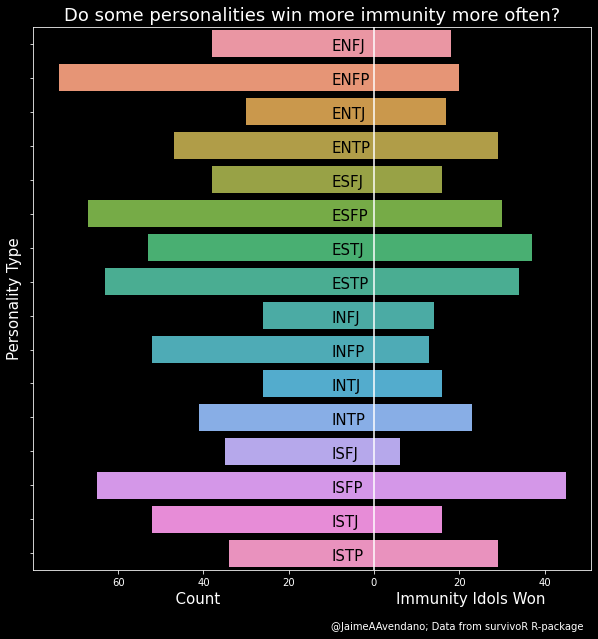

In [82]:
types_plot = types.copy()
types_plot['count'] *= -1 

plt.style.use("dark_background")

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(data=types_plot, y='personality_type', x='count', ax=ax)
sns.barplot(data=types_plot, y='personality_type', x='total_immunity_idols_won', ax=ax)
for i, pt in types_plot.personality_type.iteritems():
    plt.text(x=-10, y=i+0.2, s=pt, fontdict=dict(color='black', size=15)) 

ax.set_title('Do some personalities win more immunity more often?', size=18)
ax.set_xlabel(f'{" "*30}Count {" "*35} Immunity Idols Won', loc='left', size=15)
ax.set_ylabel('Personality Type', size=15)
ax.set_xticklabels(np.abs(ax.get_xticks()).astype('int'))
ax.set_yticklabels([])


plt.text(x=-10, y=17.25, s='@JaimeAAvendano; Data from survivoR R-package')
plt.axvline()

plt.show()